<a href="https://colab.research.google.com/github/gbladislau/DataScienceLabs/blob/main/lista_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 1: Um pouco mais sobre CDFs, BoxPlots, histogramas...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):**

2. **Matrícula(s):**

3. **E-mail(s) institucional(is):**

3. **Curso(s):**

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):**

## Sobre a Avaliação

Todas questões têm o mesmo peso/valor.

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

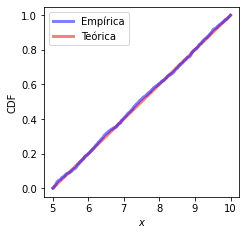

In [ ]:
plot_uniform_cdf(5, 5, 1000)

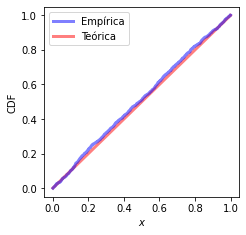

In [ ]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import norm

In [ ]:
def plot_normal_cdf(mu, sigma, n):
  #TODO
  pass

In [ ]:
plot_normal_cdf(0, 1, 100)

In [ ]:
plot_normal_cdf(0, 1, 1000)

In [ ]:
plot_normal_cdf(5, 5, 1000)

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

**ATENÇÃO:** Leia com atenção a documentação da biblioteca mencionada para entender como o parâmetro $\lambda$ deve ser fornecido. O $\lambda$ da definição acima não é o mesmo que o `scale` da biblioteca.

In [ ]:
from scipy.stats import expon

In [ ]:
def plot_exponential_cdf(lambda_, n):
  # TODO
  pass

In [ ]:
plot_exponential_cdf(1, 100)

In [ ]:
plot_exponential_cdf(5, 1000)


### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import pareto

In [ ]:
def plot_pareto_cdf(b, n):
  # TODO
  pass

In [ ]:
plot_pareto_cdf(3, 100)

In [ ]:
plot_pareto_cdf(2, 1000)

In [ ]:
plot_pareto_cdf(1, 1000)

In [ ]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez que fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar a forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [ ]:
def plot_pareto_ccdf(b, n):
  #TODO
  pass

In [ ]:
plot_pareto_ccdf(3, 1000)

In [ ]:
plot_pareto_ccdf(2, 1000)

In [ ]:
plot_pareto_ccdf(1, 1000)

In [ ]:
plot_pareto_ccdf(0.5, 1000)

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação**.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.

## Questão 3

Primeiro, você deve ler os artigos abaixo.
1. [Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)
2. [Chocolate Consumption, Cognitive Function,
and Nobel Laureates](https://utw10426.utweb.utexas.edu/quest/Q7/choco.pdf)

Resumindo o que foi lido nos artigos, responda as seguintes questões:

1. O que é o coeficiente de correlação?
2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?
3. Qual a diferença entre causalidade e correlação?

**Observação 1:** é esperado que a resposta das três perguntas utilize aproximadamente duas páginas A4.

**Observação 2:** você pode consultar outras fontes para responder as questões acima. No entanto, é esperado que as respostas sejam no contexto do conteúdo dos artigos.

## Questão 4

Obtenha o conjunto de dados disponível no AVA da disciplina para essa questão. O conjunto de dados possui duas colunas: `type` e `score`. Você pode pensar nesses dados como sendo o resultados de medições (`score`) realizadas em um conjunto de objetos que pode ser de três tipos diferentes (`type`).

### Parte (a)

Leia o conjunto de dados e armazene-o em um `DataFrame` do `Pandas`.

### Parte (b)

Usando a biblioteca `seaborn`, Faça o *BoxPlot* da variável `score` para todos os objetos, independentemente do tipo.

Agora, faça, em uma mesma figura, os *BoxPlots* para a variável `score` de acordo com a variável `type`. Isto é, um *BoxPlot* da variável `score` para cada valor de `type`. Novamente, use a biblioteca `seaborn`.

Com base **apenas** nos *BoxPlots*, o que é possível afirmar sobre a dispersão/distribuição dos dados das três variáveis? Você diria que as três distribuições são similares?


### Parte (c)

Agora:

1. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os histogramas.

2. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça as CDFs empíricas (vide Questão 1).

3. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os gráficos de Violino.



Revisitando a conclusão da Parte (b)...

Com base nessas novas figuras, o que é possível dizer sobre a dispersão/distribuição das três variáveis? Você diria que as três distribuições são similares?

## Questão 5

Ainda no espírito das duas questões anteriores.

Leia o conjunto de dados, disponível no AVA, para a Questão 5 e carregue os dados em um `DataFrame` do `Pandas`. O arquivo contém um conjunto de pontos no plano, ou seja, uma coleção de pares ($x$, $y$).

Na verdade, o arquivo é uma coleção de vários conjuntos de dados. O arquivo possui três colunas:
- `dataset` indica a qual conjunto de dados um ponto pertence
- `x` indica a coordenada $x$ de cada ponto do conjunto
- `y` indica a coordenada $y$ de cada ponto do conjunto



### Parte (a)

Para cada um dos 13 conjuntos de dados disponível no arquivo, calule e imprima:
1. A média dos valores das colunas `x` e `y`
2. O desvio padrão dos valores das colunas `x` e `y`
3. A correlação linear entre as colunas `x` e `y`

Com base nos valores observados, formule uma hipótese sobre o grau de similaridade entre os diversos conjuntos de dados. Em outras palavras, vocês diriam que eles são similares ou diferentes?

**Observação:** tente modularizar seu código e utilizar os recursos do `Pandas`, por exemplo, `groupby`.

### Parte (b)

Agora, vamos testar a hipótese estabelecida no item anterior. Faça um gráfico, para cada um dos 13 conjuntos de dados, marcando os pontos de cada conjunto no plano.

Com base nos gráficos, o que pode ser dito sobre o grau de similaridade entre os diversos conjuntos de dados? Em outras palavras, vocês diriam que eles são similares ou diferentes?

## Referências (Spoiler Alert!)

Os dados de algumas questões foram obtidos em https://www.research.autodesk.com/publications/same-stats-different-graphs/. Para não estragar a surpresa, sugiro consultar essa referência apenas após tentar resolver as questões. De toda forma, as respostas das perguntas não estão contidas na página citada.